In [230]:
import pandas as pd

In [231]:
dataset=pd.read_csv("AAPL.csv")

In [232]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,73.447502,74.989998,73.187500,74.949997,74.308266,118387200
1,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.958794,108872000
2,2020-01-08,74.290001,76.110001,74.290001,75.797501,75.148521,132079200
3,2020-01-09,76.809998,77.607498,76.550003,77.407501,76.744728,170108400
4,2020-01-10,77.650002,78.167503,77.062500,77.582497,76.918221,140644800


In [ ]:
dataset.drop(["Adj Close","Volume"],axis=1,inplace=True)

In [234]:
dataset["Price"]=(dataset["Open"]+dataset["High"]+dataset["Low"]+dataset["Close"])/4

In [235]:
dataset.drop(["Open","High","Low","Close"],axis=1,inplace=True)

In [236]:
dataset.dtypes

Date      object
Price    float64
dtype: object

In [237]:
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [238]:
dataset.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [239]:
dataset.set_index('Date',inplace=True)

In [240]:
dataset.head()

,Price
Date,
2020-01-06,74.143749
2020-01-07,74.788126
2020-01-08,75.121876
2020-01-09,77.093750
2020-01-10,77.615625


In [241]:
dataset.isnull().sum()

Price    0
dtype: int64

In [242]:
import matplotlib.pyplot as plt

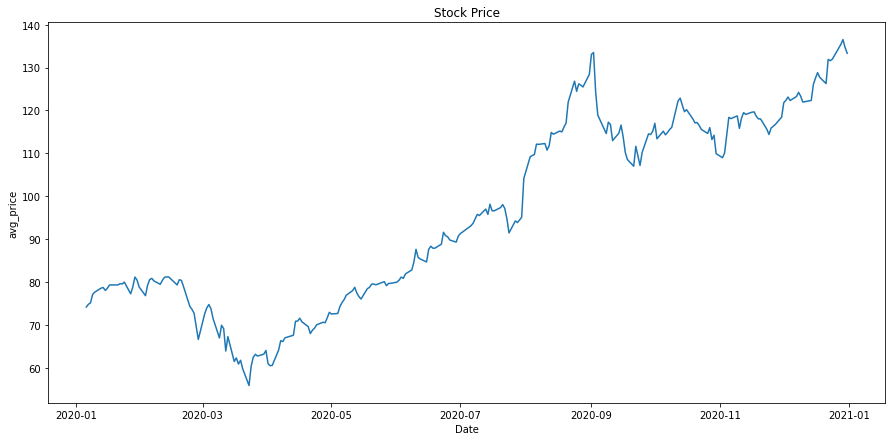

In [243]:
plt.figure(figsize=(15,7))
plt.plot(dataset["Price"])
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("avg_price")
plt.show()

# using ADF test to check stationarity 

In [244]:
import statsmodels.tsa.stattools as ts

In [245]:
def test(col) :
    result=ts.adfuller(col)
    print("Adf_statistic:{:.3f}{}p-value : {:.3f} ".format(result[0],"\n",result[1]))
    print("Critical -Values")
    for k,v in result[4].items():
        print("\t%s : %.3f" % (k,v))
    if result[1]<0.05:
        print( "Reject Ho data is stationary")
    else: 
        print("accept Ho data is non stationary")
    

In [246]:
test(dataset["Price"])

Adf_statistic:-0.272
p-value : 0.929 
Critical -Values
	1% : -3.457
	5% : -2.873
	10% : -2.573
accept Ho data is non stationary


<ipython-input-247-0e32d604e48a>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(dataset, freq = 15, model='additive')


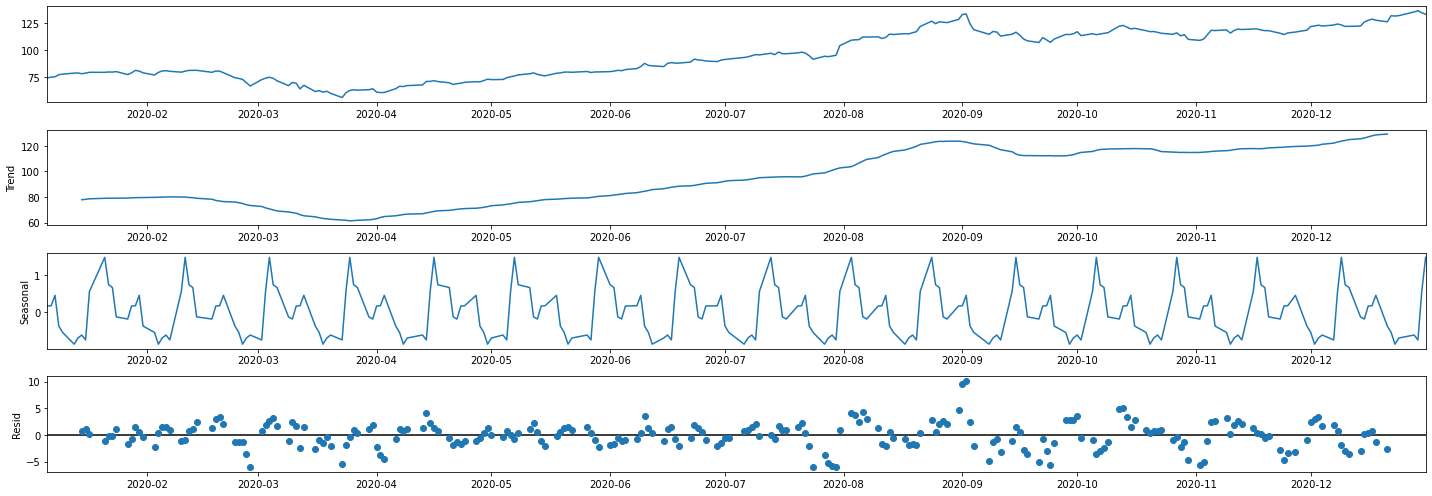

In [247]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7
decomposition = sm.tsa.seasonal_decompose(dataset, freq = 15, model='additive')
fig = decomposition.plot()
plt.show()

In [248]:
model=sm.tsa.statespace.SARIMAX(dataset,order=(1,1,1),seasonal_order=(1,1,1,12))
result=model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [249]:
result=model.fit()

In [250]:
dataset["prediction"]=result.predict(start=150,end=250
                                     ,dynamic=False)

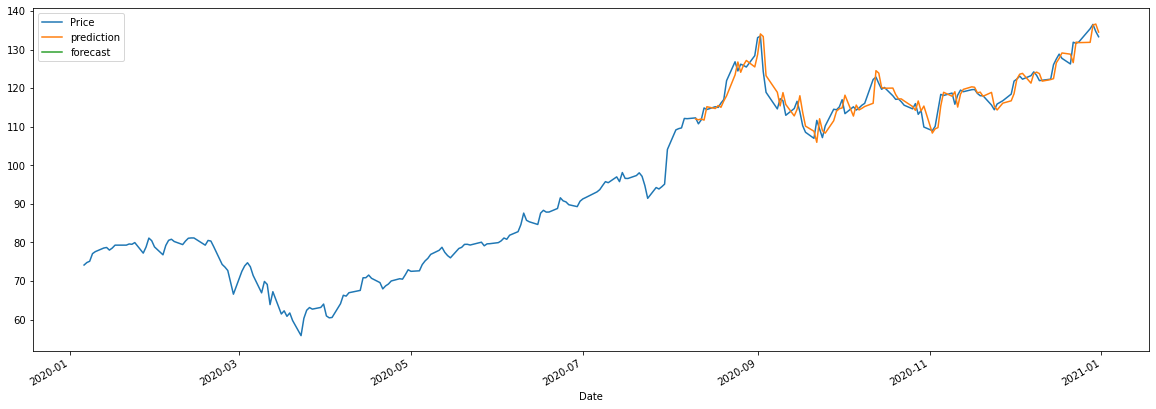

In [277]:
dataset.plot()

In [308]:
forecast=result.get_forecast(steps=30).predicted_mean

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


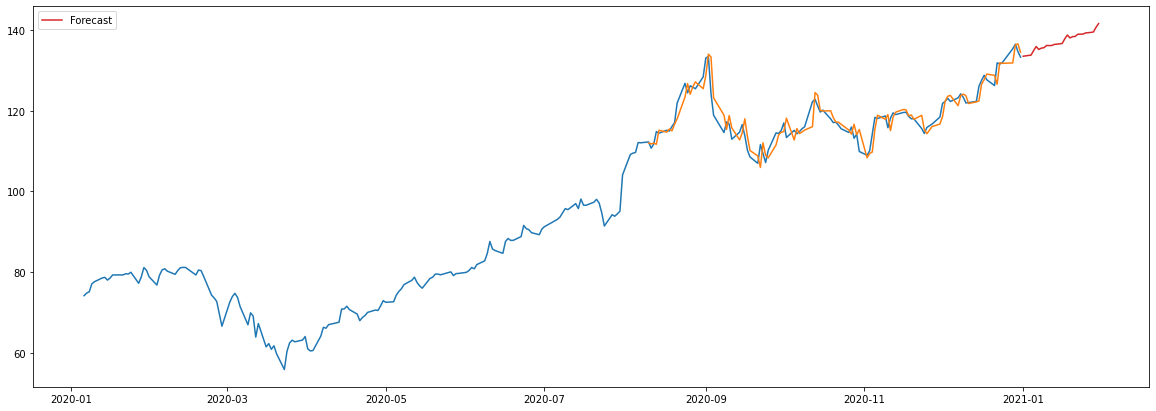

In [314]:
plt.plot(dataset)
plt.plot(pd.date_range("2021/01/01","2021/01/30",freq="D").to_series(),forecast,label="Forecast")
plt.legend()